In [2]:
#make sure pymongo works
import pymongo
import pandas as pd
from pprint import pprint

In [3]:
#connecting my pc to mongoDB database
from pymongo import MongoClient
client = MongoClient()

In [4]:
client = MongoClient('localhost', 27017)
client

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [5]:
#specifying the database
db = client['Amazon_Reviews']

In [28]:
#specifying the collection to be used in the database
collection = db['All_Reviews']
collection

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'Amazon_Reviews'), 'All_Reviews')

In [29]:
#Testing if able to query from the databse by printing one row
array = collection.find_one({'overall':5})
array

{'_id': ObjectId('5a332d0e5132162d811c8f3e'),
 'asin': 'B000H00VBQ',
 'helpful': [1, 1],
 'overall': 5.0,
 'reviewText': 'This show always is excellent, as far as british crime or mystery showsgoes this is one of the best ever made.  The stories are well done and the acting is top notch with interesting twists in the realistic and brutal storylines.  This show pulls no punches as it enters into the twisted minds of criminals and the profiler psychiatrist who helps out in a northern english city police force. The show looks like it is shot in Manchester but it is called by another name in the show.  One episode is not on this disc the excellent \'prayer of the bone" which is on a seperate disc.  Still crime shows don\'t get much better than this one on either side of the ocean.  It\'s just a great show that never has had a less than well made episode. Unfortunately like all British shows you only get about five shows a year ,  but these are an hour and a half shows , still one could hop

In [37]:
#Question _1: getting number of reviews based on year to show the trends of when amazon started getting more users 
#geting review time column and asin
get_reviewTime = list(collection.find({},{'reviewTime':True, 'asin': 1}))


In [38]:
len(get_reviewTime)


18186733

In [39]:
#converting it to a dataframe
get_reviewTime_df = pd.DataFrame(get_reviewTime)
#del get_reviewTime_df

In [40]:
#del get_reviewTime

In [41]:
#splitting year from review time
get_Year = pd.DataFrame(get_reviewTime_df.reviewTime.str.split(',',1).tolist(),
                                  columns = ['date','year'])
#del get_Year

In [63]:
del get_Year

In [47]:
get_Year.to_csv('get_year.csv', sep=',')

In [48]:
#getting the count by year 
frequency = get_Year.groupby(["year"]).size().reset_index(name="Count")
frequencysort = frequency.sort_values('year', ascending=True)
frequencysort

,year,Count
0,1996,25
1,1997,2055
2,1998,13530
3,1999,41014
4,2000,196596
5,2001,211557
6,2002,231112
7,2003,253239
8,2004,312606
9,2005,399460


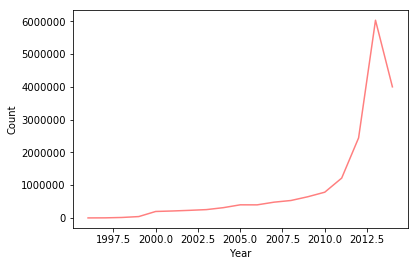

In [59]:
#plotting year vs count
import matplotlib.pyplot as plt
#plt.plot(frequencysort)
plt.plot(frequencysort.year, frequencysort.Count, color='red', alpha=0.5)
#plt.title("A (bad) Spaghetti plot", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Year")
plt.ylabel("Count")

plt.show()

In [60]:
#separting the month from reviewTime
get_month = pd.DataFrame(get_reviewTime_df.reviewTime.str.split(' ',1).tolist(),
                                  columns = ['month','date_year'])

In [61]:
get_month

,month,date_year
0,10,"30, 2013"
1,10,"16, 2013"
2,02,"11, 2009"
3,10,"15, 2013"
4,12,"29, 2013"
5,10,"11, 2011"
6,02,"26, 2014"
7,09,"3, 2012"
8,02,"7, 2014"
9,02,"6, 2014"


In [1]:
#merging the two dataframes 
asin_month = get_reviewTime_df.join(get_month)
#asin_month.head(5)

In [65]:
len(asin_month)

18186733

In [69]:
#getting the number of reviews for each month
frequency_month = get_month.groupby(["month"]).size().reset_index(name="Count")
frequencysort_month = frequency_month.sort_values('month', ascending=True)
frequencysort_month

,month,Count
0,01,1871470
1,02,1601749
2,03,1759555
3,04,1665637
4,05,1683445
5,06,1663881
6,07,1523742
7,08,1174173
8,09,1144795
9,10,1203595


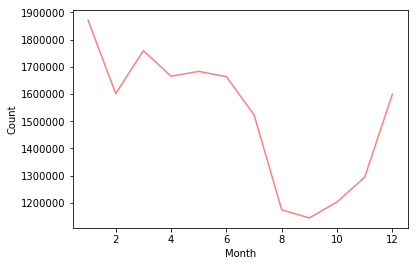

In [71]:
#plotting month vs count
import matplotlib.pyplot as plt
#plt.plot(frequencysort)
plt.plot(frequencysort_month.month, frequencysort_month.Count, color='red', alpha=0.5)
#plt.title("A (bad) Spaghetti plot", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Month")
plt.ylabel("Count")

plt.show()